# Part I - Ford GoBike System Dataset

## by Carla Mota Leal

## Introduction
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area, California.

> This dataset will require some data wrangling in order to make it tidy for analysis. 

## Wrangling


In [1]:
# importing all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Loading the dataset and describing its properties:

In [2]:
df = pd.read_csv("201902-fordgobike-tripdata.csv")

In [3]:
#exploring shape:

df.shape

(183412, 16)

In [4]:
#summary of the dataset:

df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


> Member birth year min 1878 -> Possible error.

In [5]:
#see how they look like:

df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [6]:
#checking datatypes:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [7]:
#checking for null values:

df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

> Some columns have incorrect data types.

In [8]:
# Checkinf for duplicated data:

df.duplicated().sum()

0

### We will work with a copy of the dataset:

In [9]:
# Copy 
df_cleaned = df.copy()

## Cleaning the data:

In [10]:
#Dropping the row with null value:

df_cleaned.dropna( axis = 0 , inplace = True)

### Test:

In [11]:
df_cleaned.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [12]:
df_cleaned.shape #new size

(174952, 16)

### Dropping people above 100 years old from the dataset:

In [13]:
# Dropping people more than 100 years old

df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned.member_birth_year < 1918].index)

### Test:

In [14]:
df_cleaned.member_birth_year.describe()

count    174880.000000
mean       1984.837957
std           9.974001
min        1920.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

### Correcting datatype:

In [15]:
df_cleaned['start_time'] = pd.to_datetime(df_cleaned['start_time'])
df_cleaned['end_time'] = pd.to_datetime(df_cleaned['end_time'])

### Test:

In [16]:
print(df_cleaned.dtypes)

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object


### Let's create a Column to know their age today

In [17]:
# Creating a column for age: 
df_cleaned['age'] = 2023 - df_cleaned.member_birth_year  
df_cleaned['age'] = df_cleaned['age'].astype(int)

### Test:

In [18]:
df_cleaned.head(3) #worked!

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,39
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,51
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,34


### Creating a column of duration in minutes, a column of hour & day, and a column of day name:


In [19]:
df_cleaned['duration_min'] = df_cleaned.duration_sec // 60

In [20]:
df_cleaned=df_cleaned.assign(hour=pd.to_datetime(df_cleaned['start_time']).dt.strftime("%H"), day=pd.to_datetime(df_cleaned['start_time']).dt.date)
df_cleaned['hour'] = df_cleaned['hour'].astype(int)

In [21]:
df_cleaned['day_of_week'] = df_cleaned['start_time'].dt.day_name()

### Test:

In [22]:
df_cleaned.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,duration_min,hour,day,day_of_week
161173,352,2019-02-05 15:50:40.565,2019-02-05 15:56:32.722,19.0,Post St at Kearny St,37.788975,-122.403452,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5031,Subscriber,1984.0,Male,No,39,5,15,2019-02-05,Tuesday
158042,290,2019-02-05 19:58:25.705,2019-02-05 20:03:16.253,269.0,Telegraph Ave at Carleton St,37.862320,-122.258801,239.0,Bancroft Way at Telegraph Ave,37.868813,...,5087,Subscriber,1996.0,Female,No,27,4,19,2019-02-05,Tuesday
44856,1034,2019-02-22 13:28:53.505,2019-02-22 13:46:07.917,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,100.0,Bryant St at 15th St,37.767100,...,5223,Subscriber,1977.0,Male,No,46,17,13,2019-02-22,Friday
174238,1035,2019-02-02 19:53:06.720,2019-02-02 20:10:22.443,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,64.0,5th St at Brannan St,37.776754,...,4728,Subscriber,1993.0,Male,No,30,17,19,2019-02-02,Saturday
110927,343,2019-02-12 17:37:02.044,2019-02-12 17:42:45.154,112.0,Harrison St at 17th St,37.763847,-122.413004,108.0,16th St Mission BART,37.764710,...,3706,Subscriber,1979.0,Female,No,44,5,17,2019-02-12,Tuesday


### Creating a column that contain if the day is weekday or weekend:

In [23]:
weekday = ( 'Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday' )
weekend = ( 'Saturday' , 'Sunday' )

def type_day(day) :
    
    if day in weekday :
        type_of_day = 'weekday'
    
    else :
        type_of_day = 'weekend'
        
    return type_of_day 

df_cleaned['type_of_day'] = df_cleaned['day_of_week'].apply(type_day) 

### Test: 

In [24]:
df_cleaned.sample(2) #worked!

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,duration_min,hour,day,day_of_week,type_of_day
52109,497,2019-02-21 17:29:39.429,2019-02-21 17:37:57.222,70.0,Central Ave at Fell St,37.773311,-122.444293,377.0,Fell St at Stanyan St,37.771917,...,Subscriber,1961.0,Male,Yes,62,8,17,2019-02-21,Thursday,weekday
87231,1501,2019-02-17 09:52:58.945,2019-02-17 10:18:00.345,153.0,59th St at Horton St,37.840945,-122.291360,249.0,Russell St at College Ave,37.858473,...,Customer,1971.0,Male,No,52,25,9,2019-02-17,Sunday,weekend


### Dropping unNecessary columns for this analysis:


In [25]:
df_cleaned.drop(['start_station_latitude', 
                 'start_station_longitude' , 
                 'end_station_latitude' , 
                 'end_station_longitude' ,
                 'member_birth_year' , 
                 'bike_id' , 
                 'duration_sec'] , axis = 1 ,inplace = True) 

### Saving the new dataframe:

In [26]:

df_cleaned.to_csv('2019-02-fordgobike-clean.csv')

In [27]:
df_cleaned.head()

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_gender,bike_share_for_all_trip,age,duration_min,hour,day,day_of_week,type_of_day
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,Customer,Male,No,39,869,17,2019-02-28,Thursday,weekday
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),Customer,Male,No,51,1030,12,2019-02-28,Thursday,weekday
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,Subscriber,Other,No,34,608,17,2019-02-28,Thursday,weekday
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,Subscriber,Male,Yes,49,26,23,2019-02-28,Thursday,weekday
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,Subscriber,Male,No,64,29,23,2019-02-28,Thursday,weekday


### Structure of the dataset

- The dataset started with 183412 rows and 16 columns.
- Some columns have missing values.
- There's no duplicated data.
- Some columns have incorrect data types (e.g. date).
- This dataset could use some new columns for future investigations.

### Main feature(s) of interest in the dataset

- Age, duration of trips, day of the week, type of the day, user type, stations and gender.


## Univariate Exploration

> In this section, I will investigate distributions of individual variables. 

### Question 1: What is the frequency of trips during the week?

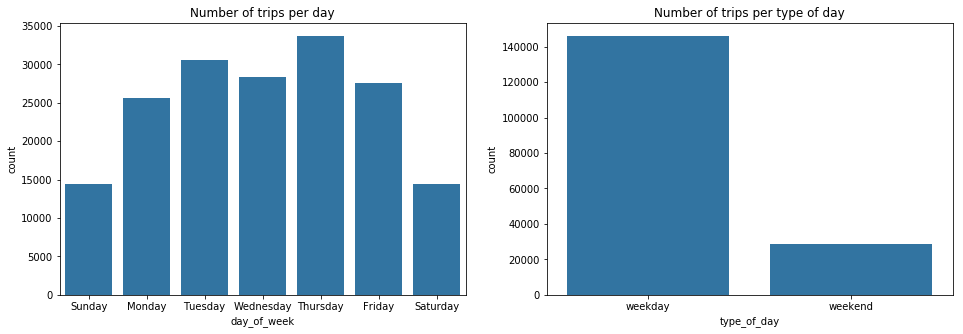

In [28]:
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]     # making plot of one color 
days = ('Sunday' , 'Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday', 'Saturday')
    
    
plt.subplot(1, 2, 1)
sb.countplot(data= df_cleaned , x='day_of_week' , color=base_color , order = days)
plt.title('Number of trips per day')


plt.subplot(1, 2, 2)
sb.countplot(data= df_cleaned , x='type_of_day' , color=base_color)
plt.title('Number of trips per type of day');
 

> **Observation:** The number of trips are higher during the weekdays, and especially during the days: Thursday, Tuesday and Wednesday.

### Question 2: Which gender uses the bike service the most?

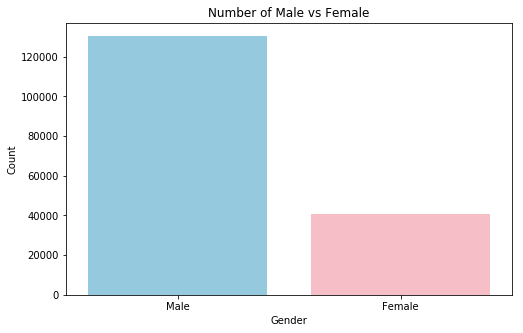

In [29]:
plt.figure(figsize=[8, 5])
colors = ['skyblue', 'lightpink']
gender = ('Male', 'Female')

sb.countplot(data=df_cleaned, x='member_gender', palette=colors, order=gender)
plt.title('Number of Male vs Female')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

> **Observations:** Males count for 3x the number of females that use the bike service.

### Question 3: Which type of costumer uses the service the most?

Text(0,0.5,'Count')

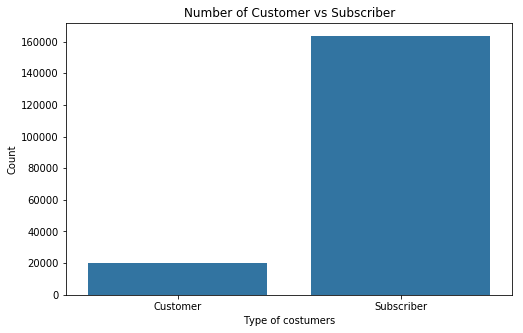

In [30]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[0]    
 
sb.countplot(data= df , x='user_type' , color=base_color )
plt.title('Number of Customer vs Subscriber')
plt.xlabel('Type of costumers')
plt.ylabel('Count')

> **Observations:** Majority of the costumers that uses the bike service are Subscribers already.

### Question 4: What are the most common ages for the users?

(10, 90)

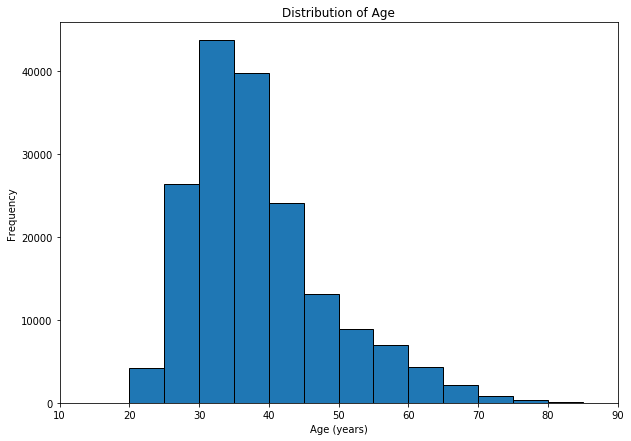

In [31]:
plt.figure(figsize = [10, 7])
bins_x = np.arange(10, df_cleaned['age'].max()+5, 5)

plt.hist(data= df_cleaned , x='age', bins = bins_x, edgecolor='black')
plt.title('Distribution of Age') 
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.xlim((10,90))

In [32]:
df_cleaned.age.describe().T

count    174880.000000
mean         38.162043
std           9.974001
min          22.000000
25%          31.000000
50%          36.000000
75%          43.000000
max         103.000000
Name: age, dtype: float64

> **Observations:** From the graph, it is possible to assume that majority of the users has 30-40 years old. Minimum age is 22 years old, and average is ~38 years old. 

### Question 5: What is the distribution in minutes of the trips?

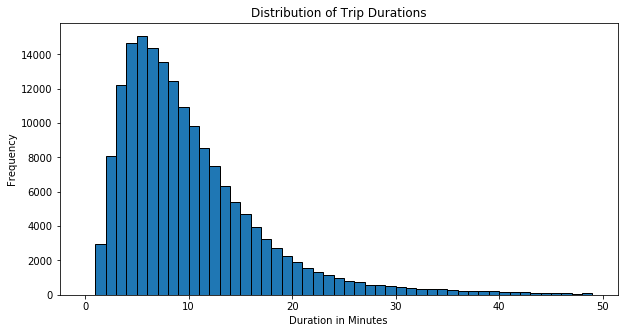

In [33]:
plt.figure(figsize=[10, 5])
bins_x = np.arange(0, 50, 1)

plt.hist(data=df_cleaned, x='duration_min', bins=bins_x, edgecolor='black')
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration in Minutes')
plt.ylabel('Frequency')

plt.show()

> **Observations:** Majority of the trips occur between 3min to 20 min rides/trips. Very few are above 30 min.

### Question 6: What is the top 10 most used start station?

In [34]:
top_10_station = df_cleaned['start_station_name'].value_counts().head(10).index

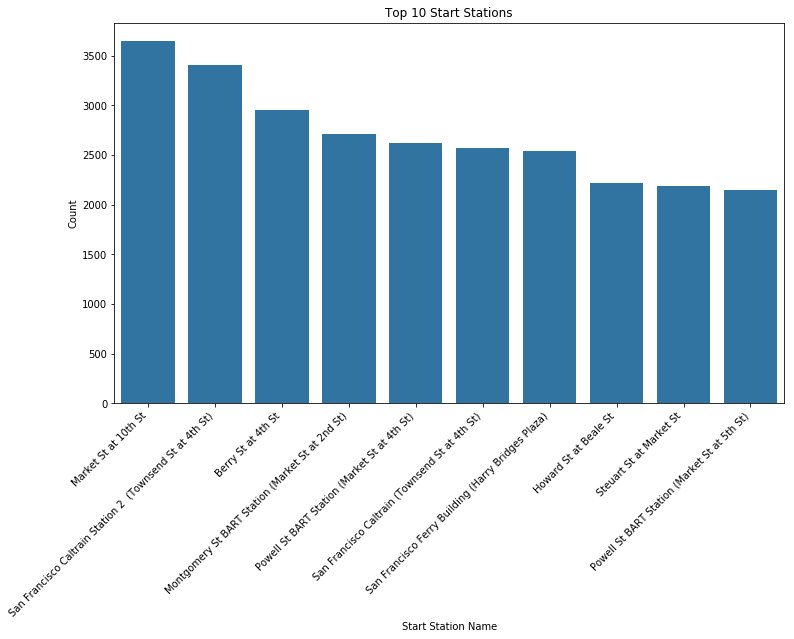

In [35]:
plt.figure(figsize=[12, 7])
base_color = sb.color_palette()[0]

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

ax = sb.countplot(data=df_cleaned, x='start_station_name', color=base_color, order=top_10_station)
plt.title('Top 10 Start Stations')
plt.xlabel('Start Station Name')
plt.ylabel('Count')

# Relabeling the tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

> **Observations:** The station Market St at 10th St. is the most used to start trips with the bike service. 

### Question 7: Which hours are the most used to rent the bikes?

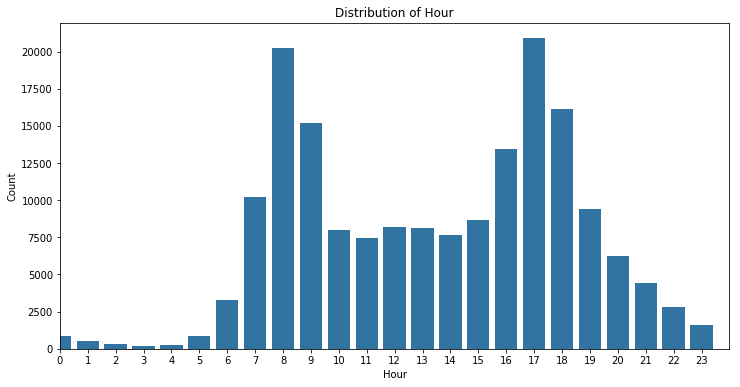

In [36]:
plt.figure(figsize=[12, 6])
base_color = sb.color_palette()[0]

bins_x = np.arange(0, df_cleaned['hour'].max() + 1, 1)

sb.countplot(data=df_cleaned, x='hour', color=base_color)
plt.title('Distribution of Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xlim((0, 24)) #show only 0-24h range

plt.show()

> **Observations:** I can assume that the most used hours are 8h and 17h, and around +/- 1h those hours there's still high volume of users renting bikes.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Question 8: What is the distrubution of the duration of trips in minutes according to gender?

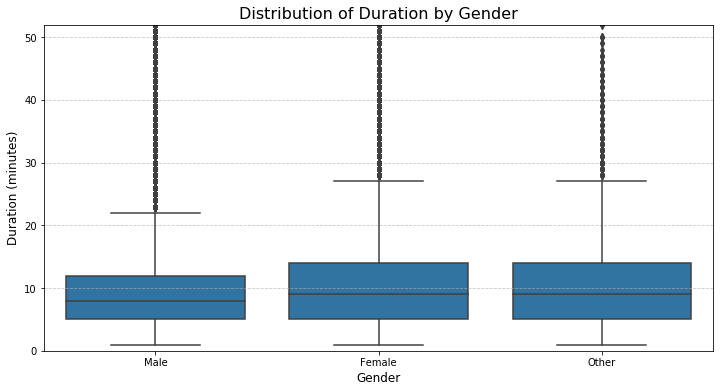

In [37]:
# To visualize the distribution of duration in minutes versus gender, I can use a box plot or a violin plot. Both plots are effective in comparing the distribution of a numerical variable across different categories. 
plt.figure(figsize=[12, 6])
base_color = sb.color_palette()[0]
df_duration = df_cleaned.query( " duration_min <= 60") 

sb.boxplot(data=df_duration, x='member_gender', y='duration_min', color=base_color)
plt.title('Distribution of Duration by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Duration (minutes)', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, df_cleaned['duration_min'].quantile(0.99))

plt.show()

> **Observations:** The values have a similar range of duration in minutes for all genders. There's outliers in all three genders.

### Question 9: What is the distribution of uset type according to its age?

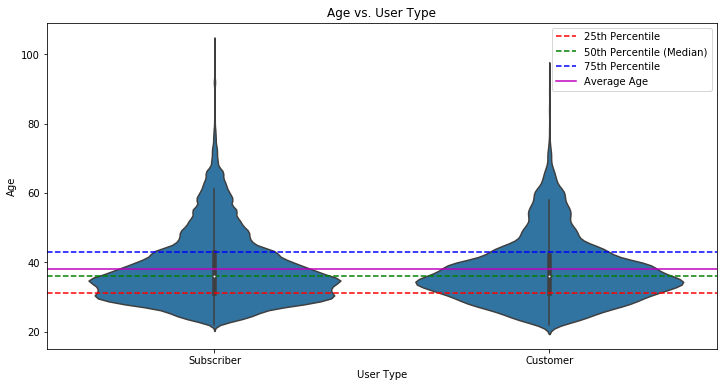

In [38]:
df_duration = df_cleaned.query("duration_min <= 60")

plt.figure(figsize=[12, 6])
base_color = sb.color_palette()[0]

sb.violinplot(data=df_duration, x='user_type', y='age', color=base_color)

# Adding quartiles
quartiles = np.percentile(df_duration['age'], [25, 50, 75])
plt.axhline(quartiles[0], color='r', linestyle='--', label='25th Percentile')
plt.axhline(quartiles[1], color='g', linestyle='--', label='50th Percentile (Median)')
plt.axhline(quartiles[2], color='b', linestyle='--', label='75th Percentile')

# Adding average line
average_age = df_duration['age'].mean()
plt.axhline(average_age, color='m', linestyle='-', label='Average Age')

plt.xlabel('User Type')
plt.ylabel('Age')
plt.title('Age vs. User Type')
plt.legend()

plt.show()

> **Obersvations:** It is able to assume that for both Subscriver and Customer users type the age average is similar.

### Question 10: What is the distribution of age vs. gender for the bike users?

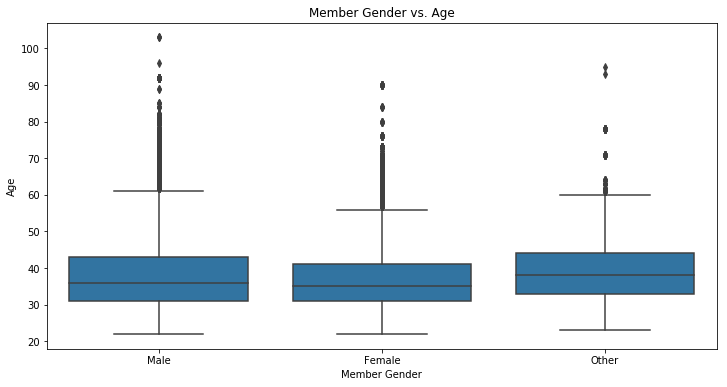

In [39]:
plt.figure(figsize=[12, 6])
base_color = sb.color_palette()[0]

sb.boxplot(data=df_duration, x='member_gender', y='age', color=base_color)

plt.xlabel('Member Gender')
plt.ylabel('Age')
plt.title('Member Gender vs. Age')

plt.show()

> **Observations:** The average female users shows to have a slight lower age compared to males and others. 

### Question 11: How is the distribution of users by gender and by age group?

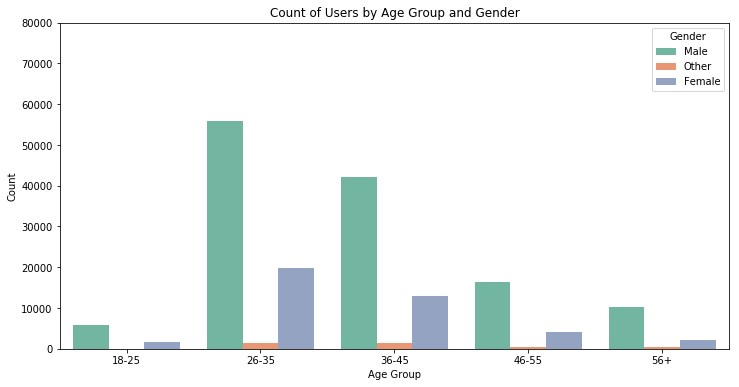

In [64]:
plt.figure(figsize=[12, 6])

# Grouping age into bins
age_bins = [18, 25, 35, 45, 55, 100]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56+']
df_cleaned['age_group'] = pd.cut(df_cleaned['age'], bins=age_bins, labels=age_labels)

sb.countplot(data=df_cleaned, x='age_group', hue='member_gender', palette='Set2')

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Count of Users by Age Group and Gender')
plt.legend(title='Gender')

# Adjusting the visibility of the bars
plt.ylim([0, 80000])

plt.show()

> **Observations:**  I can assume that the higher number of users per gender and age are from males of age between 26-35 yearls old.

### Question 12: What day is the service used the most?

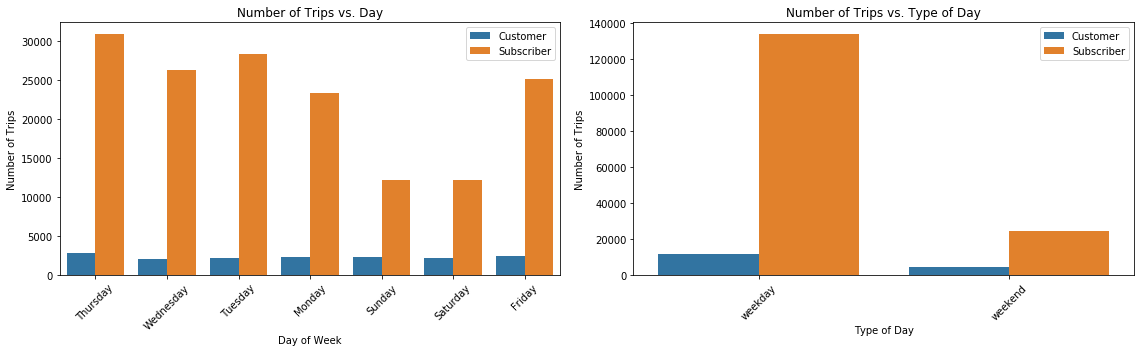

In [47]:
plt.figure(figsize=[16, 5])

plt.subplot(1, 2, 1)
sb.countplot(data=df_cleaned, x='day_of_week', hue='user_type')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.title('Number of Trips vs. Day')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(1, 2, 2)
sb.countplot(data=df_cleaned, x='type_of_day', hue='user_type')
plt.xlabel('Type of Day')
plt.ylabel('Number of Trips')
plt.title('Number of Trips vs. Type of Day')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

> **Observations:** Number of trips during the weekdays is much higher for the Subscribers compared to Customers.Same can be said for the days of the week. 

### Question 13: How does it look the number of trip Vs weekdays or Vs member_gender?

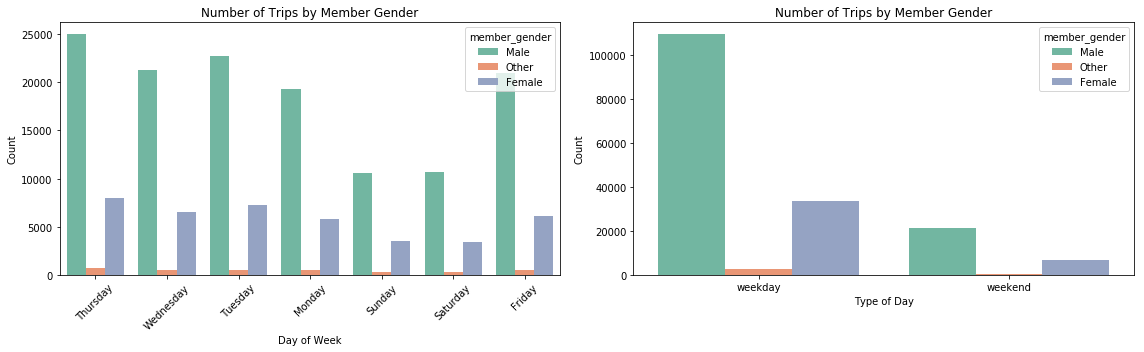

In [66]:
plt.figure(figsize=[16, 5])

plt.subplot(1, 2, 1)
sb.countplot(data=df_cleaned, x='day_of_week', hue='member_gender', palette='Set2')
plt.title('Number of Trips by Member Gender')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sb.countplot(data=df_cleaned, x='type_of_day', hue='member_gender', palette='Set2')
plt.title('Number of Trips by Member Gender')
plt.xlabel('Type of Day')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

> **Observations:** Males showed to be in higher numbers during weekdays and days of the week. 

## Multivariate Exploration

> Creating plots of three or more variables to investigate the data even
further. 

### Question 14: What is the distribution of hour, day of the week and type of day?

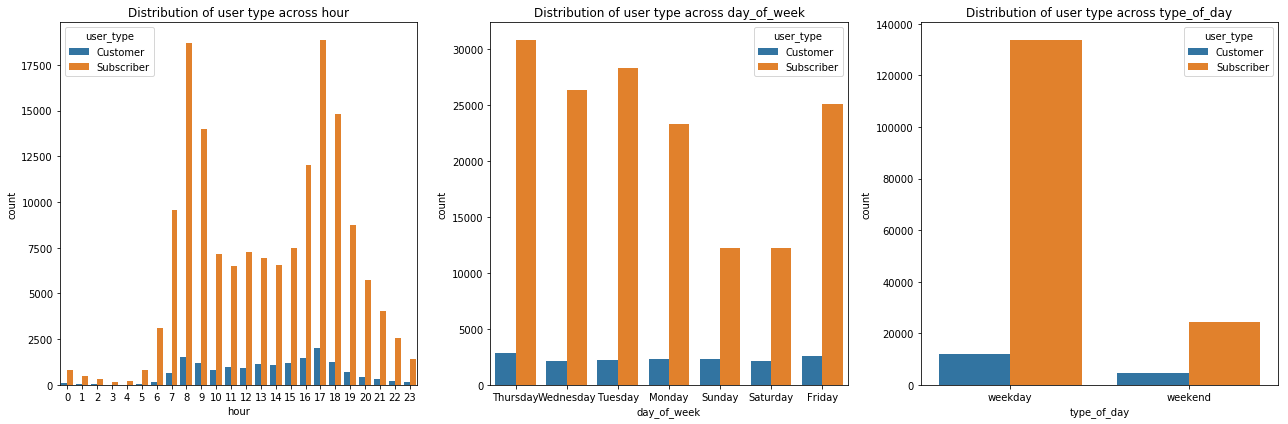

In [73]:
variables = ['hour', 'day_of_week', 'type_of_day']

plt.figure(figsize=[18, 6])

for i, variable in enumerate(variables, 1):
    plt.subplot(1, len(variables), i)
    sb.countplot(data=df_cleaned, x=variable, hue='user_type')
    plt.title(f'Distribution of user type across {variable}')
    plt.xlabel(variable)

plt.tight_layout()
plt.show()

> **Observations:** Can assume that subscribers are the responsible for majority of the number of users between the high volue hours, busy weekdays and days of the week.

### Question 15: What is the distribution of age across different user types and member genders?

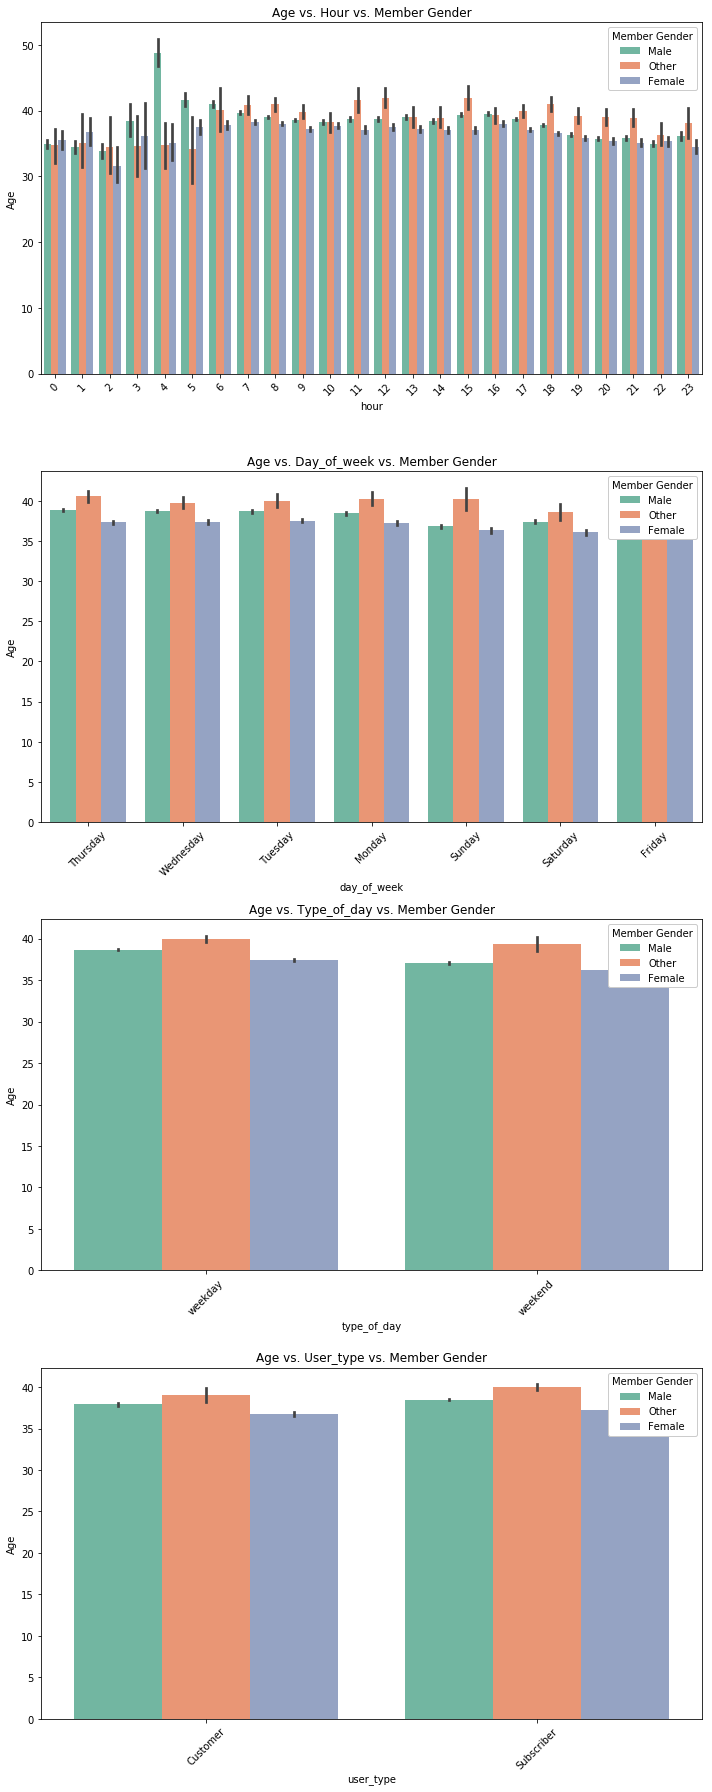

In [88]:
def plot_barplot(data, x_var, y_var, hue_var):
    ax = sb.barplot(data=data, x=x_var, y=y_var, hue=hue_var, palette='Set2')
    ax.legend(loc='upper right', ncol=1, framealpha=1, title='Member Gender')
    plt.title(f'{y_var.capitalize()} vs. {x_var.capitalize()} vs. Member Gender')
    plt.xticks(rotation=45)

variables = ['hour', 'day_of_week', 'type_of_day', 'user_type']

plt.figure(figsize=[10, 25])

for i, variable in enumerate(variables, 1):
    plt.subplot(len(variables), 1, i)
    plot_barplot(df_cleaned, variable, 'age', 'member_gender')
    plt.xlabel(variable)
    plt.ylabel('Age')

plt.tight_layout()
plt.show()

> **Observations:** The average age continues mostly around 30-40 yars old, where normally male is older than female with Others even older. The distribution looks nearly the same. 

### Question 16: What is the correlation between variables?

In [77]:
#This allows me to understand how variables are related to each other, not just in pairs but across the entire set of variables.
correlation_matrix = df_cleaned.corr()
print(correlation_matrix)

                  start_station_id  end_station_id       age  duration_min  \
start_station_id          1.000000        0.340103 -0.118642     -0.006943   
end_station_id            0.340103        1.000000 -0.114576      0.002524   
age                      -0.118642       -0.114576  1.000000      0.006256   
duration_min             -0.006943        0.002524  0.006256      1.000000   
hour                      0.013175        0.091713 -0.065039      0.006123   

                      hour  
start_station_id  0.013175  
end_station_id    0.091713  
age              -0.065039  
duration_min      0.006123  
hour              1.000000  


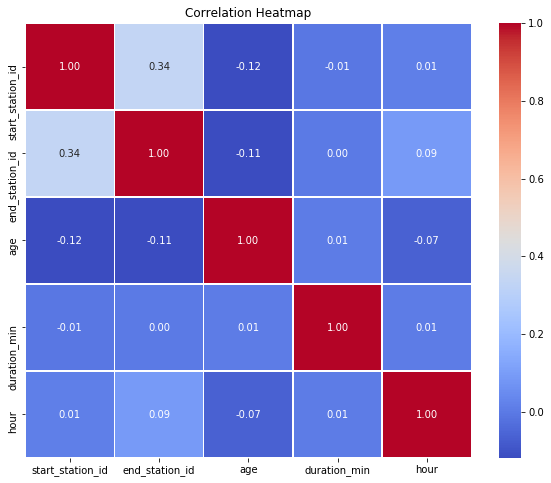

In [79]:
variables = ['start_station_id', 'end_station_id', 'age', 'duration_min', 'hour']
correlation_matrix = df_cleaned[variables].corr()

plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

> **Observations:** There's a strong correlation between the variables: age - hour, as well as start_station_id and end_station_id with age, but not relevant to the analysis.

### Based on the data visualization performed, several key observations can be made:

1- The number of trips is higher during weekdays, particularly on Thursday, Tuesday, and Wednesday. This suggests that the bike service is more frequently utilized for commuting or weekday activities.

2- Males account for approximately three times the number of females using the bike service. This indicates a significant gender disparity in bike usage, with males being the dominant users.

3- The majority of customers utilizing the bike service are already subscribed members. This highlights the importance of subscriber loyalty and the potential benefits of subscription-based models.

4- The age distribution of users indicates that the majority falls within the 30-40-year-old range. The minimum age observed is 22 years old, and the average age is approximately 38 years old. This suggests that the service appeals primarily to users in their late 20s to early 40s.

5- Most trips have a duration between 3 and 20 minutes, with very few exceeding 30 minutes. This suggests that the bike service is primarily used for short-distance travel or quick trips within the city.

6- The station located at Market St at 10th St. is the most popular starting point for bike trips, indicating its convenience or popularity among users.

7- Peak usage hours for the bike service are around 8 AM and 5 PM, with a noticeable volume of users extending approximately +/- 1 hour from these peak hours. This suggests that the service is frequently utilized during typical morning and evening commuting times.

8- The duration of trips shows a similar range across all genders, with outliers observed in all three categories. This indicates that trip durations vary but do not show significant gender-based differences.

9- The average age for both subscriber and customer user types appears to be similar, suggesting that age is not a differentiating factor between these user categories.

10- On average, female users tend to be slightly younger compared to males and others. This slight age difference may indicate varying preferences or usage patterns among different genders.

11- The highest number of users by gender and age group falls within males aged between 26-35 years old. This demographic segment shows the highest user participation in terms of both age and gender.

12- The number of trips during weekdays is significantly higher for subscribers compared to customers, reflecting the more frequent use of the service by subscribed members. This pattern is consistent throughout the days of the week.

13- Males show a higher number of trips during weekdays and days of the week, indicating their higher level of engagement with the bike service during these periods.

14- Subscribers are responsible for the majority of users during high-volume hours, busy weekdays, and days of the week. This suggests that the subscription model encourages regular and consistent bike usage.

15- The average age distribution remains predominantly around 30-40 years old, with males generally being older than females, and other gender categories exhibiting even older average ages. The overall distribution among genders appears similar.

16- Strong correlations are observed between certain variables such as age and hour, as well as start_station_id and end_station_id with age. However, these correlations may not be directly relevant to the analysis conducted.

## Conclusions


#### The data visualization provides valuable insights into user behavior and patterns within the bike service. The findings suggest that the service is primarily utilized for commuting purposes, with a significant gender disparity in usage. The age range of users tends to be concentrated in the 30-40-year-old bracket, and subscribers account for the majority of users during peak hours and weekdays. These observations can help inform marketing strategies, service improvements, and target audience considerations for the bike service.